# Development of video using Matplotlib


In [1]:
from diffractio import degrees, mm, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

## Generates a XZ field and show plots for each z

In [2]:
# Initial parameters
x0 = np.linspace(-300 * um, 300 * um, 512)
z0 = np.linspace(-0.125 * um, 800 * um, 1024)
wavelength = 0.6238 * um * 10

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

In [3]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)

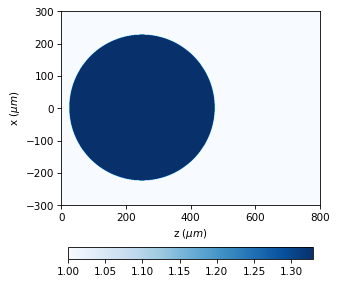

In [4]:
# insert cylinder
u1.cylinder(
    r0=(0, 250 * um), radius=(225 * um, 225 * um), refractive_index=1.33, angle=0
)
u1.draw_refractive_index(scale="scaled", colorbar_kind="horizontal")

In [5]:
# propagation
u1.WPM(verbose=False, has_edges=True)

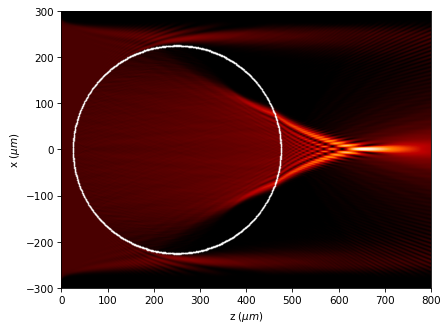

In [6]:
u1.draw(logarithm=True, scale="scaled", draw_borders=True)

In [7]:
seconds = 1.0
u1.video(
    kind="intensity",
    logarithm=True,
    normalize=False,
    time_video=10 * seconds,
    frames_reduction=5,
    filename="creating_video.mp4",
    dpi=100,
)

In [8]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="creating_video.mp4" type="video/mp4">
</video></div>

## Generates a XYZ field and show plots XY for each z

In [9]:
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [10]:
wavelength0 = 0.6238 * um

size = 250 * um
num_data = 256
x0 = np.linspace(-size / 2, size / 2, num_data)
y0 = np.linspace(-size / 2, size / 2, num_data)
z0 = np.linspace(500 * um, 1.5 * mm, 64)

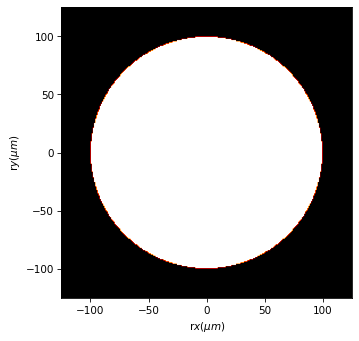

In [11]:
radius = 100 * um
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength0)
t1.circle(r0=(0 * um, 0 * um), radius=radius, angle=0 * degrees)
t1.draw()

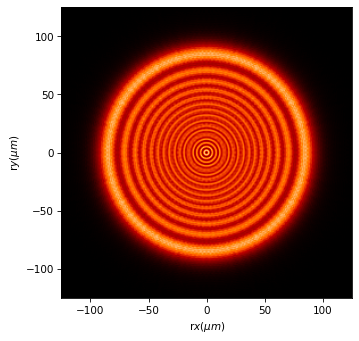

In [12]:
u2 = t1.RS(z=500 * um, verbose=True)
u2.draw()

In [14]:
u_xyz = Scalar_field_XYZ(x0, y0, z0, wavelength0)
u_xyz.incident_field(t1)
u_xyz.RS(num_processors=1)

time in RS= 1.5567982196807861. num proc= 1


In [ ]:
u_xyz.video("video_circle.mp4", axis="auto", fps=10)

[![alt text](https://img.youtube.com/vi/video-id/0.jpg)](./video_circle.mp4)